## Color Segmentation With Line Detection
### Task 1 Count color pixels and bottles

In [20]:
from matplotlib import pyplot as plt
import cv2
%matplotlib inline
import pandas as pd
import numpy as np
import math
from math import atan


<function print(*args, sep=' ', end='\n', file=None, flush=False)>

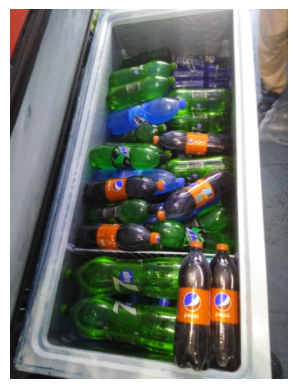

In [606]:
image = cv2.imread('PBC.jpg')
img = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_HSV2BGR))
plt.axis('off')
print

In [426]:
boundaries = [
([165, 45, 80], [179, 255, 255]),# RED
([9, 75, 80], [22, 255, 255]),# ORANGE
([100,20, 20], [170, 255, 255]),#BLUE
([30, 55, 0], [80, 255, 255]) #GREEN
]

In [427]:
i = 0
for (lower, upper) in boundaries:
    i = i+1
    lower = np.array(lower, dtype = "uint8")
    upper = np.array(upper, dtype = "uint8")
    # find the colors within the specified boundaries and apply
    # the mask
    mask = cv2.inRange(img, lower, upper)
    new_file_name = f"processed_image_{i}.jpg"
    output = cv2.bitwise_and(image, image, mask = mask)
    cv2.imwrite(new_file_name,output)
    # show the images
    cv2.imshow("images",np.hstack([image, output]))
    cv2.waitKey(0)

In [466]:
red = cv2.imread('processed_image_1.jpg')
orange = cv2.imread('processed_image_2.jpg')
blue = cv2.imread('processed_image_3.jpg')
green = cv2.imread('processed_image_4.jpg')
cv2.imshow('red', red)
cv2.imshow('orange', orange)
cv2.imshow('blue', blue)
cv2.imshow('green', green)
cv2.waitKey(0)

-1

In [486]:
def count_bottles(image):
    # Convert image in grayscale
    gray_im = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Contrast adjusting with gamma correction y = 1.2
    gray_correct = np.array(255 * (gray_im / 255) ** 1.2 , dtype='uint8')
    # Local adaptative threshold
    thresh = cv2.adaptiveThreshold(gray_correct, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 101, 9)
    thresh = cv2.bitwise_not(thresh)
    # Dilatation et erosion
    kernel = np.ones((15,15), np.uint8)
    img_dilation = cv2.dilate(thresh, kernel, iterations=1)
    img_erode = cv2.erode(img_dilation,kernel, iterations=1)
    # clean all noise after dilatation and erosion
    img_erode = cv2.medianBlur(img_erode, 7)
    # Labeling
    ret, labels = cv2.connectedComponents(img_erode)
    label_hue = np.uint8(179 * labels / np.max(labels))
    blank_ch = 255 * np.ones_like(label_hue)
    labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])
    labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)
    labeled_img[label_hue == 0] = 0

    plt.subplot(222)
    plt.title('Objects counted:'+ str(ret-1))
    plt.imshow(labeled_img)
    print('objects number is:', ret-1)
    plt.show()
    return
def count_pixels(image):
    ret, thresh1 = cv2.threshold(image, 50, 255, cv2.THRESH_BINARY)
    n_white_pix = np.sum(thresh1 == 255)
    n_black_pix = np.sum(thresh1 == 0)
    print('Number of white pixels:', n_white_pix)
    print('Number of black pixels :', n_black_pix)
    print('Percentage of drink :',(n_white_pix/n_black_pix)*100 )
    return

objects number is: 3


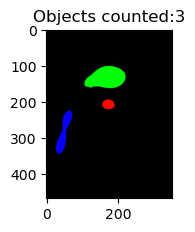

In [493]:
# Count Bottles
count_bottles(orange)

In [494]:
# Count Liquid
count_pixels(red)

Number of white pixels: 7590
Number of black pixels : 482760
Percentage of drink : 1.5722097936863035


In [696]:
image.shape

(467, 350, 3)

## FInd dimensions of Freezer using line detection

In [34]:
def euclidean_distance(point1, point2):
    if len(point1) != len(point2):
        raise ValueError("Both points should have the same number of dimensions.")

    squared_distance = sum((x - y) ** 2 for x, y in zip(point1, point2))
    return math.sqrt(squared_distance)
def midpoint(x1, y1, x2, y2):
    mid_x = (x1 + x2) / 2
    mid_y = (y1 + y2) / 2
    return (mid_x, mid_y)

In [45]:
def draw_lines(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    kernel_size = 5
    blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)

    # Apply edge detection method on the image
    edges = cv2.Canny(blur_gray, 100, 150, apertureSize=3)

    # This returns an array of r and theta values
    lines = cv2.HoughLines(edges, 1, np.pi/180, 200)
    i=0
    # The below for loop runs till r and theta values
    # are in the range of the 2d array
    mid_p=[]
    for r_theta in lines:
        i=i+1
        arr = np.array(r_theta[0], dtype=np.float64)
        r, theta = arr
        # Stores the value of cos(theta) in a
        a = np.cos(theta)

        # Stores the value of sin(theta) in b
        b = np.sin(theta)

        # x0 stores the value rcos(theta)
        x0 = a*r

        # y0 stores the value rsin(theta)
        y0 = b*r

        # x1 stores the rounded off value of (rcos(theta)-1000sin(theta))
        x1 = int(x0 + 467*(-b))

        # y1 stores the rounded off value of (rsin(theta)+1000cos(theta))
        y1 = int(y0 + 467*(a))

        # x2 stores the rounded off value of (rcos(theta)+1000sin(theta))
        x2 = int(x0 - 467*(-b))

        # y2 stores the rounded off value of (rsin(theta)-1000cos(theta))
        y2 = int(y0 - 467*(a))

        # cv2.line draws a line in img from the point(x1,y1) to (x2,y2).
        # (0,0,255) denotes the colour of the line to be
        # drawn. In this case, it is red.
        point1=(x1,y1)
        point2=(x2,y2)
        print("Line",i,"length : ")
        mid_p.append(midpoint(x1, y1, x2, y2))
        print(euclidean_distance(point1, point2))
        print("angle:" ,math.degrees(np.arctan2(y2 - y1, x2 - x1)))
        cv2.line(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
        cv2.line(img, (x1, 0), (x1, 467), (0, 255, 0), 2)
        plt.imshow(img)
    print("Midpoints Distance :",euclidean_distance(mid_p[0], mid_p[1]))
    

## Find angle of lines

Line 1 length : 
933.2872012408614
angle: 86.99043915456828
Line 2 length : 
933.383629597177
angle: -78.0038512459226
Midpoints Distance : 180.81067446364997


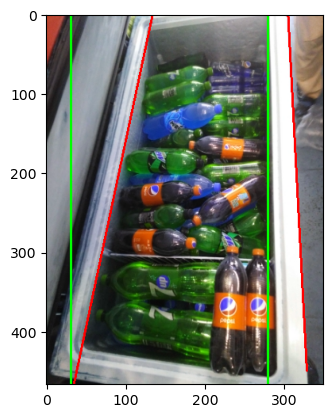

In [46]:
draw_lines('PBC.jpg')

## Length of bottles

In [616]:

image = cv2.imread('PBC.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (3, 3), 0)
# Step 2: Threshold the image to create a binary image
_, binary = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Step 3: Perform connected component analysis (CCA)
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary, connectivity=8)

# Step 4: Draw bounding boxes around the connected components
for i in range(1, num_labels):
    x, y, w, h, area = stats[i]
    if area > 10 and area < 2000:  # You can adjust the area threshold as needed
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Step 5: Display the result
cv2.imshow('Connected Components', image)
cv2.waitKey(0)
cv2.destroyAllWindows()
